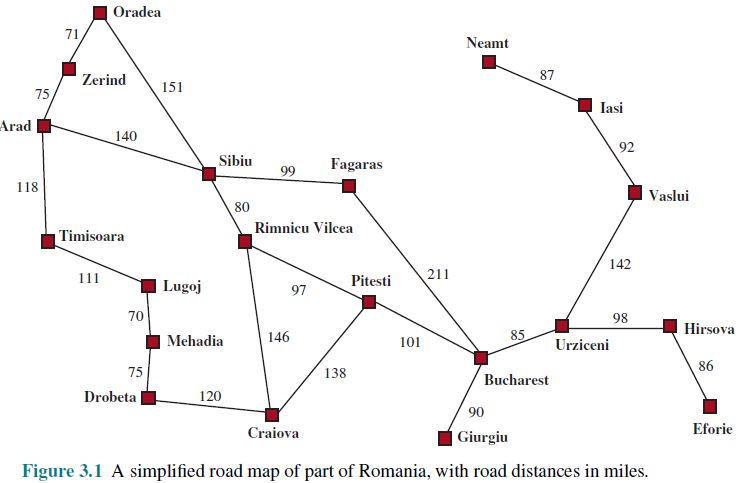

In [20]:
romanian_map = {
    'Arad': {'Sibiu':140, 'Zerind':75, 'Timisoara':118},
    'Zerind': {'Arad':75, 'Oradea':71},
    'Oradea': {'Zerind':71, 'Sibiu': 151},
    'Sibiu': {'Arad':140, 'Oradea':151, 'Fagaras':99, 'Rimnicu':80},
    'Timisoara': {'Arad': 118, 'Lugoj':111},
    'Lugoj': {'Timisoara':111, 'Mehadia':70},
    'Mehadia': {'Lugoj': 70, 'Drobeta':75},
    'Drobeta': {'Mehadia':75, 'Craiova':120},
    'Craiova': {'Drobeta': 120, 'Rimnicu': 146, 'Pitesti': 138},
    'Rimnicu': {'Sibiu': 80, 'Craiova': 146, 'Pitesti': 97},
    'Fagaras': {'Sibiu':99, 'Bucharest':211},
    'Pitesti': {'Rimnicu': 97, 'Craiova':138, 'Bucharest':101},
    'Bucharest': {'Fagaras':211, 'Pitesti': 101, 'Giurgiu':90, 'Urziceni':85},
    'Giurgiu': {'Bucharest': 90},
    'Urziceni': {'Bucharest': 85, 'Vaslui':142, 'Hirsova':98},
    'Hirsova': {'Urziceni':98, 'Eforie':86},
    'Eforie': {'Hirsova':86},
    'Vaslui': {'Iasi': 92, 'Urziceni':142},
    'Iasi': {'Vaslui':92, 'Neamt': 87},
    'Neamt': {'Iasi':87}
}

# Uniform Cost Search

In [26]:
from queue import PriorityQueue


def ucs(startingNode, destinationNode):
    expanded = [] # to store expanded nodes. so that we don't re-generate again
    frontier = PriorityQueue() #taking priority queue, because our priority is select the node that has least value

    node = (0, startingNode, [startingNode]) #(g(n) = path cost, city name, path)
    frontier.put(node)
    
    while not frontier.empty():
        node = frontier.get() # select a node for expansion. node that has least value will generate
        u = node[1] 
        if u == destinationNode:# goal test            
            print(node)
            print(expanded)
            return node[2] # path
        expanded.append(u)
        for v in romanian_map[u].keys():#expanding            
            if v not in expanded:
                cost = node[0] + romanian_map[u][v]
                path = node[2] + [v]
                frontier.put((cost,v,path))
                print(v+ ", Cost: " +str(cost))
                print(path)
                print('')
                
    print('Failed')

In [25]:
ucs('Arad', 'Lugoj') # change source and destination

Sibiu, Cost: 140
['Arad', 'Sibiu']

Zerind, Cost: 75
['Arad', 'Zerind']

Timisoara, Cost: 118
['Arad', 'Timisoara']

Oradea, Cost: 146
['Arad', 'Zerind', 'Oradea']

Lugoj, Cost: 229
['Arad', 'Timisoara', 'Lugoj']

Oradea, Cost: 291
['Arad', 'Sibiu', 'Oradea']

Fagaras, Cost: 239
['Arad', 'Sibiu', 'Fagaras']

Rimnicu, Cost: 220
['Arad', 'Sibiu', 'Rimnicu']

Craiova, Cost: 366
['Arad', 'Sibiu', 'Rimnicu', 'Craiova']

Pitesti, Cost: 317
['Arad', 'Sibiu', 'Rimnicu', 'Pitesti']

(229, 'Lugoj', ['Arad', 'Timisoara', 'Lugoj'])
['Arad', 'Zerind', 'Timisoara', 'Sibiu', 'Oradea', 'Rimnicu']


['Arad', 'Timisoara', 'Lugoj']

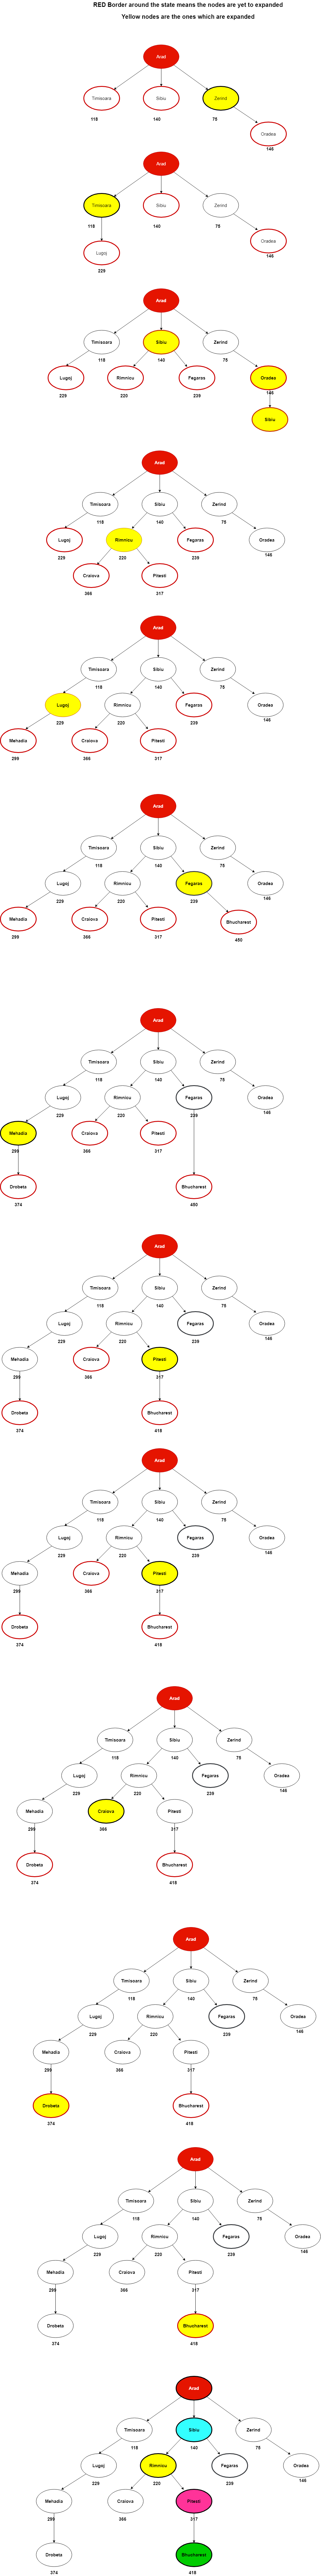

# Greedy Best First Search

In [30]:
# SLD heuristic for the destination (Bucharest)
h = {'Arad': 366,'Zerind':  374,'Oradea': 380,'Sibiu': 253,
    'Timisoara': 329,'Lugoj': 244,'Mehadia': 241,'Drobeta': 242,
    'Craiova': 160,'Rimnicu': 193,'Fagaras': 176,'Pitesti': 100,
    'Bucharest': 0,'Giurgiu': 77,'Urziceni': 80,'Hirsova': 151,
    'Eforie': 161,'Vaslui': 199,'Iasi': 226,'Neamt': 234
} 

In [63]:
from queue import PriorityQueue

def gbfs(startingNode, destinationNode):
    expanded = [] # to store expanded nodes
    frontier = PriorityQueue()

    unode = (h[startingNode],startingNode,[startingNode],0) # (h, city, path, path cost)
    frontier.put(unode)

    while not frontier.empty():
        unode = frontier.get() 
        u = unode[1]
        
        if u== destinationNode:#Goal Test            
            print("")
            print('heuristics: ')
            print(unode[0])
            print("")
            print('g(n)--initial to target: ')
            print(unode[3])
            print("")
            print("Expanded Nodes: ")
            print(expanded)
            print("")
            print("Path: ")
            return unode[2] #path
        
        expanded.append(u)
        for v in romanian_map[u].keys():            
            if v not in expanded:
                cost = unode[3] + romanian_map[u][v]
                path = unode[2]+[v]
                frontier.put((h[v],v,path, cost))

                
    print('Failed')

In [64]:
gbfs('Lugoj', 'Craiova') # change source only


heuristics: 
160

g(n)--initial to target: 
265

Expanded Nodes: 
['Lugoj', 'Mehadia', 'Drobeta']

Path: 


['Lugoj', 'Mehadia', 'Drobeta', 'Craiova']

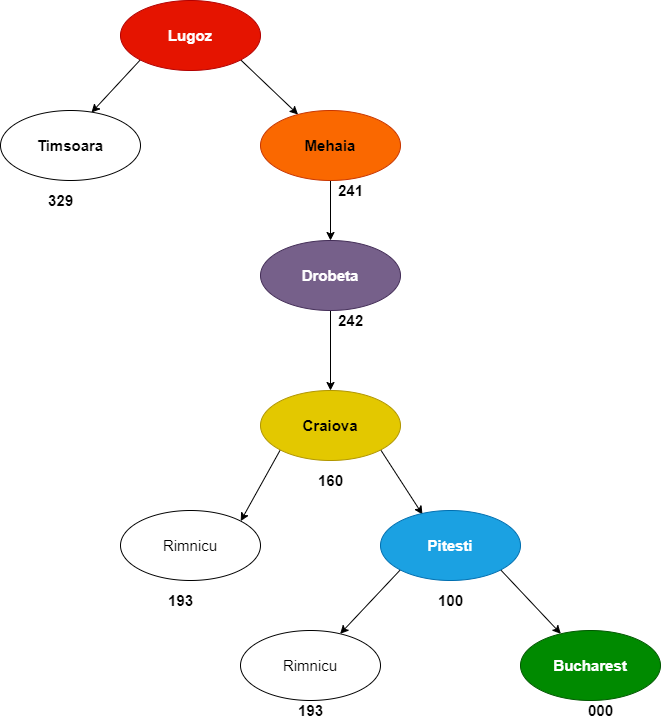

# A*

In [116]:
from queue import PriorityQueue

def a_start(startingNode, destinationNode):
    expanded = [] # to store expanded nodes
    frontier = PriorityQueue()

    unode = (h[startingNode], startingNode, [startingNode], 0) # (h, city, path, path cost)
    frontier.put(unode)

    while not frontier.empty():
        unode = frontier.get() 
        u = unode[1]        
        if u== destinationNode:#Goal Test            
            print(unode)
            print(expanded)
            return unode[2] #path
        expanded.append(u)
        
        for v in romanian_map[u].keys():            
                cost = unode[3] + romanian_map[u][v]
                total = h[v] + cost
                path = unode[2]+[v]
                frontier.put((total, v, path, cost))
                print(v+ ", Cost: " +str(total))
    
    print('Failed')

In [115]:
a_start('Arad', 'Bucharest') # change source only

Sibiu, Cost: 393
Zerind, Cost: 449
Timisoara, Cost: 447
Arad, Cost: 646
Oradea, Cost: 671
Fagaras, Cost: 415
Rimnicu, Cost: 413
Sibiu, Cost: 553
Craiova, Cost: 526
Pitesti, Cost: 417
Sibiu, Cost: 591
Bucharest, Cost: 450
Rimnicu, Cost: 607
Craiova, Cost: 615
Bucharest, Cost: 418
(418, 'Bucharest', ['Arad', 'Sibiu', 'Rimnicu', 'Pitesti', 'Bucharest'], 418)
['Arad', 'Sibiu', 'Rimnicu', 'Fagaras', 'Pitesti']


['Arad', 'Sibiu', 'Rimnicu', 'Pitesti', 'Bucharest']

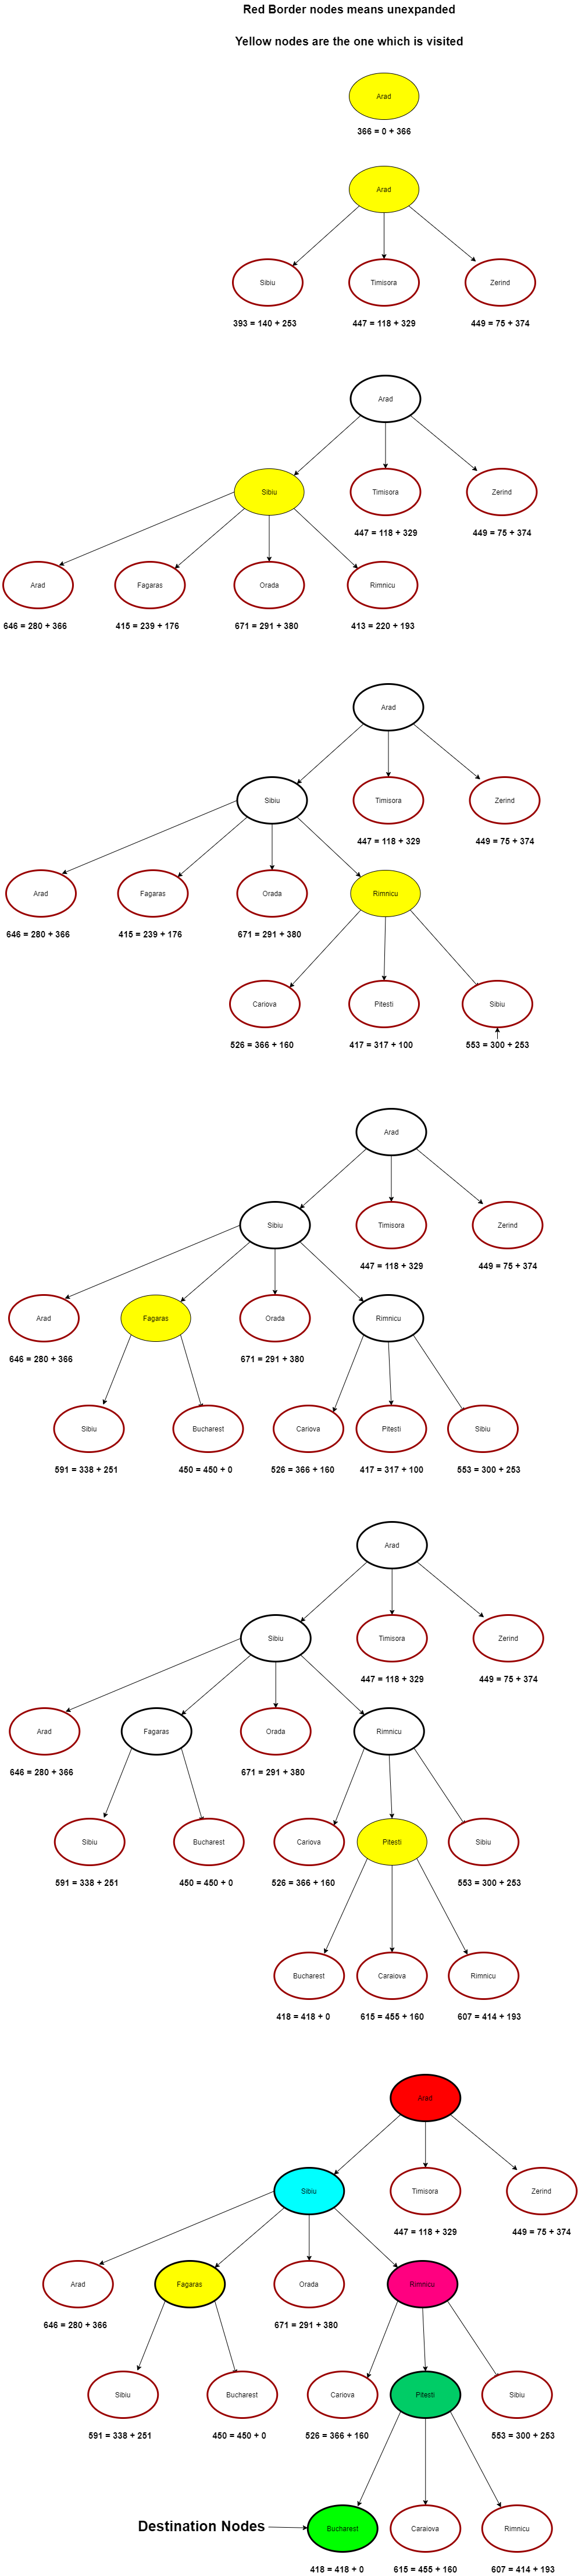

In [111]:
romanian_map["Sibiu"]["Arad"]

140

366